### PBL2-3번
- 고객 데이터를 K-Means 클러스터링을 통해 세분화하고, 그 결과를 평가
- 데이터셋: Mall_Customers.csv
- 전처리
    - Annual Income, Spending Score열 사용
    - StandardScaler로 표준화
    - 학습/테스트 데이터 분리(8:2)
- 모델 학습
    - 엘보우 기법으로 최적 K결정
    - K-means로 학습 후 테스트 데이터에 적용
- 평가 및 시각화
    - 실루엣 점수 출력
    - 학습/테스트 결과 산점도 시각화
    - 각 클러스터 특징 분석

- 가이드
    - K-Means와 StandardScaler 사용
    - Inertia, silhouette_score 계산 및 matplotlib 시각화

- 엘보우 그래프를 통해 촤적 K를 선택하자!. 선택 이유도 명확히 설명할 것

- 시각화 결과 및 해석 능력
    - 클러스터 중심과 각 데이터 포인트를 시각적으로 표현
    - 시각화를 통해 패턴을 해석!

- 분석 결과 정리 및 주석 처리
    - 각 클러스터의 특징(고소득/고소비 등)을 언급했는가?

### 구성 함수 생각하기
- 스케일링 함수
    - def scaled_data(X):
    -   scaler = StandardScaler()
    -   return scaler.fit_transform(X)

- K-means 함수
    - def run_kmeans(X, n_cluster=k, verbose=True)
    
- silhousette Score 함수
    - def run_silhouette(X, labels) #X: 2D array, labels: 1D array
    - metric: 거리 계산 방식 (기본값은 'euclidean')
    - 데이터의 평균 실루엣 계수를 반환



In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
# 스케일링 함수
def scaled_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [48]:
# K-means 함수
def run_kmeans(X, n_clusters=3):
    model = KMeans(n_clusters=n_clusters, random_state=42)   #모델 생성
    model.fit(X)   
    # inertia = model.inertia_    #군집 응집도
    # centers = model.cluster_centers_    #클러스터 중심 좌표
    # labels = model.labels_  # 각 샘플의 클러스터 레이블
    return model  

In [4]:
#K-Means 군집 결과 시각화 함수
def plot_kmeans_result(X, model, cmap='viridis'):
    #각 샘플의 클러스터 레이블. 
    #모델을 생성 후 사용하기 때문에 다시 만들지 않고 labels_로 라벨을 불러옴
    cluster_labels = model.labels_
    centers = model.cluster_centers_    #클러스터 중심 좌표

    #시각화
    plt.figure(figsize=(12,6))
    plt.scatter(X[:,0], X[:,1], c=cluster_labels, cmap='viridis', s=30, label='Clustered Data')

    # 클러스터 중심 시각화
    plt.scatter(centers[:, 0], 
                centers[:, 1],
                s=200, 
                c='red',    #빨간색    
                label="Centroids",
                marker='X') #X모양 
    plt.title("Data after Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
# 엘보우 그래프 함수
def plot_elbow(X, max_k=10):
    inertias = []   #k별 inertia 저장 리스트

    for k in range(1, max_k):
        kmeans_temp = KMeans(n_clusters=k,random_state=42)
        kmeans_temp.fit(X)
        inertias.append(kmeans_temp.inertia_)

    # 엘보우 그래프 시각화
    plt.figure(figsize=(12,6))
    plt.plot(range(1, max_k), inertias, marker='o')
    plt.title('Elbow Method for Optimal L')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS (within-Cluster Sum of Squeares)')
    plt.grid(True)
    plt.show()

In [41]:
# silhouette 함수
def run_silhouette(X, labels):
    total_score = silhouette_score(X, labels)   #전체 실루엣 점수
    sample_scores = silhouette_samples(X, labels)   #각 데이터 포인트의 점수
    n_clusters = len(np.unique(labels)) #총 군집 수 구하기
    y_lower = 10    #첫 번째 클러스터 막대를 그리기 시작할 y 좌표


    plt.figure(figsize=(12, 6))
    for i in range(n_clusters): #클러스터별로 반복
        cluster_sample_score = sample_scores[labels == i]  #해당 클러스터에 속한 샘플들의 실루엣 점수 
        cluster_sample_score.sort() #오름차순 정렬
        size_cluster_i = cluster_sample_score.shape[0]
        y_upper = y_lower + size_cluster_i
    
        # 클러스터별 막대 그리기
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sample_score)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # 클러스터 번호
        y_lower = y_upper + 10 # 다음 클러스터로 이동

    # 그래프 설정
    plt.axvline(x=total_score, color="red", linestyle="--") # 평균 실루엣 점수
    plt.title("Silhouette Plot for K-Means Clustering")
    plt.xlabel("Silhouette Score")
    plt.ylabel("Cluster")
    plt.show()
    

In [7]:
# 시각화 함수-scatter
def plot_scatter(x, labels, cmap='viridis', s=30):
    plt.figure(figsize=(12, 6))
    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap=cmap, s=s, edgecolor='black')
    plt.title('Clustering Result')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

In [8]:
#데이터 가져오기
customer_data = pd.read_csv('Mall_Customers.csv')

In [13]:
#열의 이름을 바꾸기
customer_data = customer_data.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})
#사용할 열 선택하기
df_selected = customer_data[['Annual Income', 'Spending Score']]

In [14]:
df_selected

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [23]:
#데이터 표준화
X_scaled = scaled_data(df_selected)

In [24]:
#표준화된 데이터를 다시 데이터프레임 형태로 변환
df_scaled = pd.DataFrame(X_scaled, columns=df_selected.columns)

In [19]:
df_scaled

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [49]:
#학습/테스트 데이터 분리
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


In [50]:
#K-Means 학습
train_model =  run_kmeans(X_train, 5)

In [51]:
#학습 데이터
train_lables = train_model.predict(X_train)

In [57]:
#테스트 데이터
test_model = run_kmeans(X_test,5)

test_labels = test_model.predict(X_test)

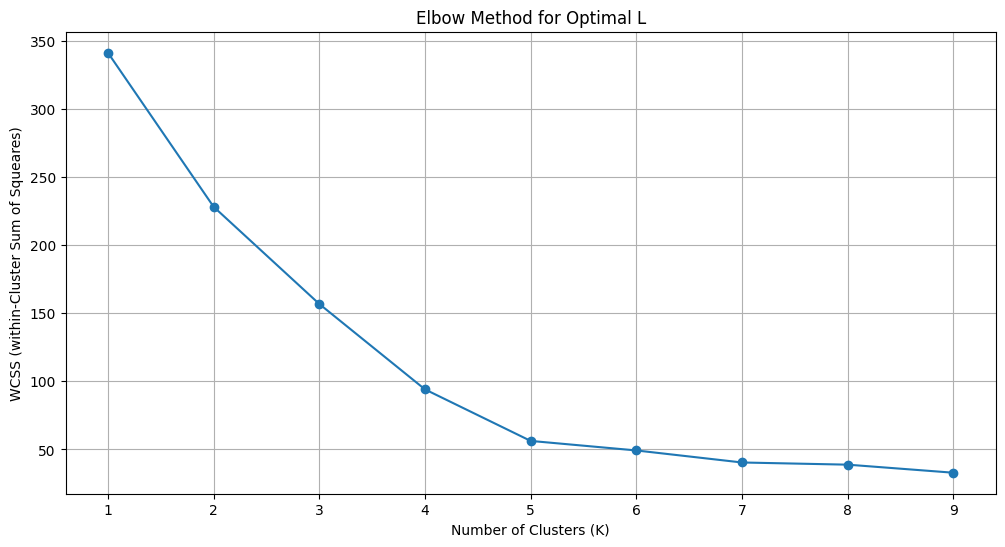

In [52]:
#K의 최적값을 찾기 위한 엘보우 그래프 --> K는 5선택
print('K의 최적값을 찾기 위한 엘보우 그래프')
elbow_graph = plot_elbow(X_train)

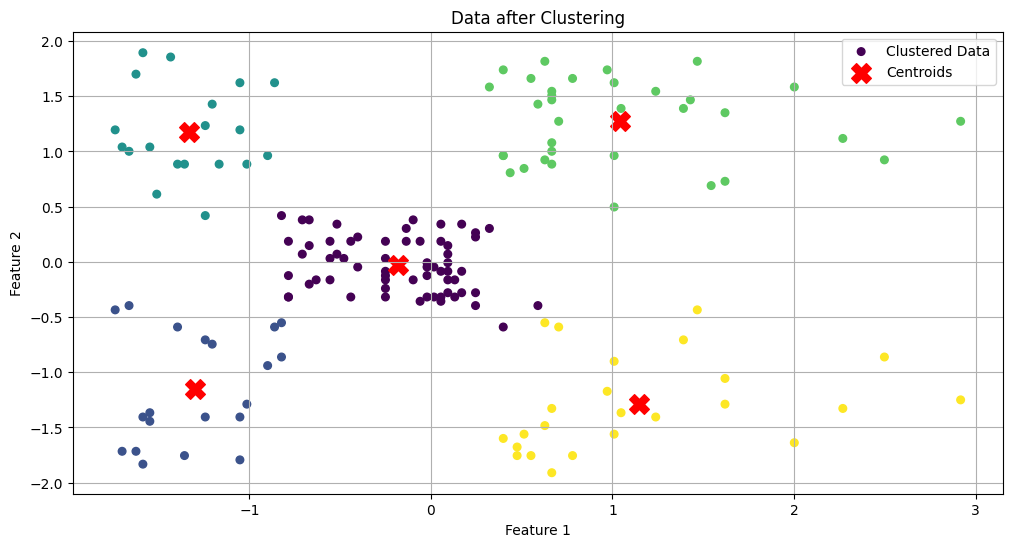

In [53]:
#K-Means 군집 결과 시각화
print('K-Means 군집 결과 시각화')
kmeans_train = plot_kmeans_result(X_train, model=train_model)

학습 데이터 산점도


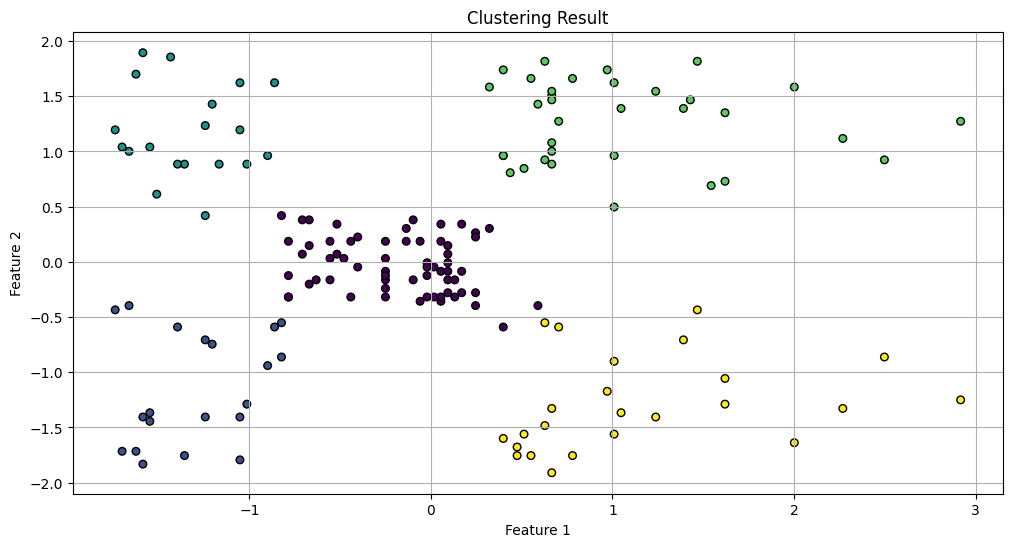

In [59]:
#학습 데이터 및 테스트 데이터 산점도
print('학습 데이터 산점도')
plot_scatter(X_train, train_lables)

테스트 데이터 산점도


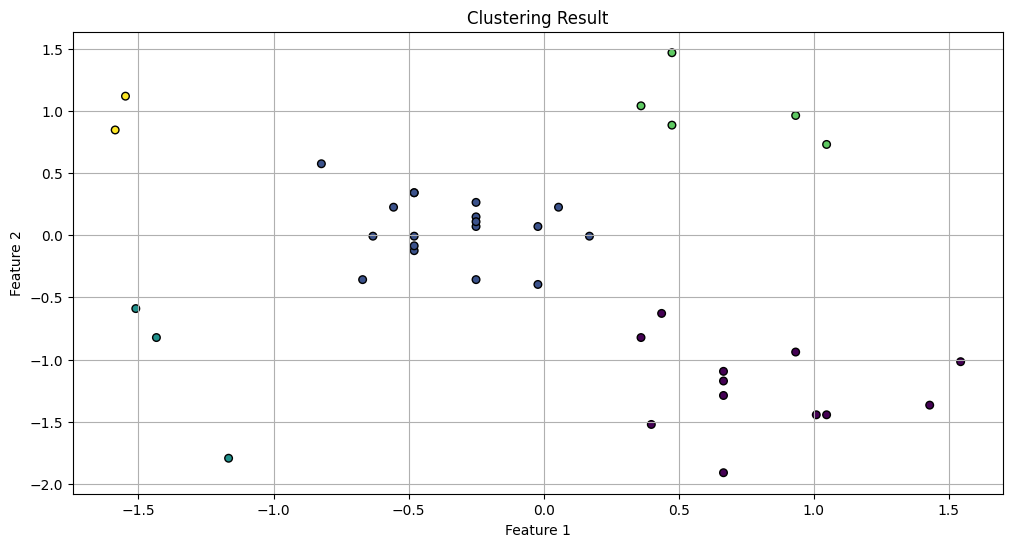

In [60]:
print('테스트 데이터 산점도')
plot_scatter(X_test, test_labels)

실루엣 점수 그래프


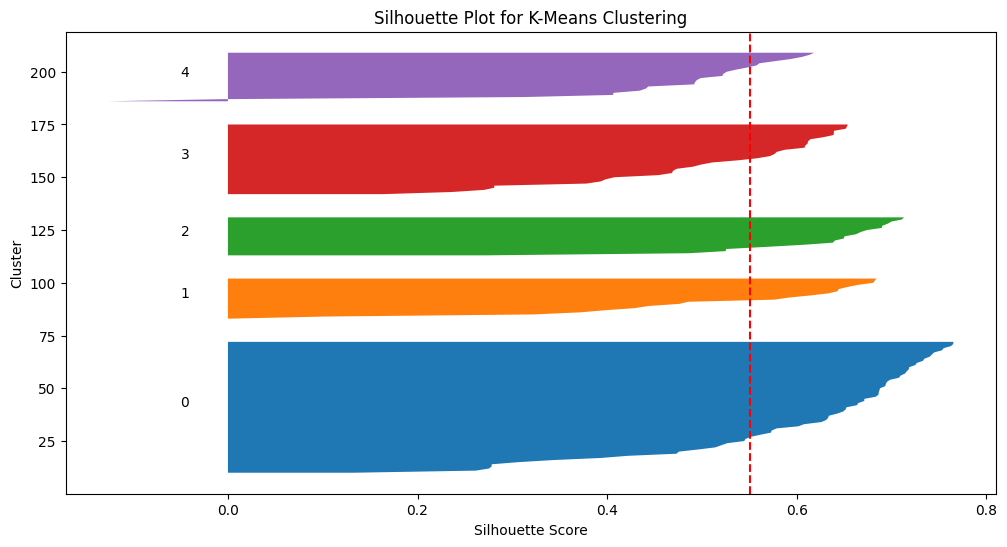

In [61]:
#실루엣 점수 확인
print('실루엣 점수 그래프')
sil_score = run_silhouette(X_train, train_model.labels_)  #train_model[3] == labels

In [ ]:
#실루엣 점수 분석
print('전체적으로 막대 개수가 차이가 나 데이터 분포가 불균형할 수 있다.')
print('군집 0번은 평균 이상의 데이터들이 많이 있어 나쁘지 않게 형성된 집단이다. 데이터가 가장 많다.')
print('군집 1번은 데이터가 많이 없지만 점수가 좋은 편이다.')
print('군집 2번은 1번과 비슷하게 데이터가 많지 않지만 가장 균형잡혀있다고 볼 수 있다.')
print('군집 3번은 값 차이가 많이 나 겹치는 데이터가 많을 수 있다.')
print('군집 4번은 점수 차이가 크게 나진 않지만 평균 이하의 데이터가 많아 뚜렷하게 나뉘어지지 않았을 수 있다.')

In [ ]:
#정리
print('정리: 엘보우 그래프를 통해 기울기가 급격하게 줄어드는 값인 5를 선택하였다')
print('시각화를 통해 5개의 군집으로 나뉘는 것을 확인할 수 있었다.')
print('각 클러스터의 특징')
print('1.소득이 적은데 소비 점수가 높은 그룹')
print('2. 소득이 적고 소비 점수가 낮은 그룹')
print('3. 소득과 소비 점수가 중간인 그룹')
print('4. 소득이 많고 소비 점수가 높은 그룹')
print('5. 소득이 많고 소비 점수가 낮은 그룹')
 